# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

**Цель проекта** — маркетинговый анализ развлекательного приложения Procrastinate Pro+.\
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.\
Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Изучим:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

В нашем распоряжении три датасета:
- `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта,
- `orders_info_short.csv` — информацию о заказах,
- `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Загрузка и предобработка данных

### Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Сохраняем датасеты в переменные

In [2]:
visits = pd.read_csv('/visits_info_short.csv')
orders = pd.read_csv('/orders_info_short.csv')
costs = pd.read_csv('/costs_info_short.csv')

### Знакомимся с данными

In [3]:
# посмотрим информацию о посещениях сайта
display(
    visits.sample(10),
    visits.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
224573,656137835689,France,Android,LeapBob,2019-06-04 14:18:42,2019-06-04 14:34:25
205278,354976320022,United States,iPhone,organic,2019-10-28 06:44:33,2019-10-28 08:06:51
247656,80107050102,Germany,Android,LeapBob,2019-07-20 13:05:28,2019-07-20 13:35:33
150062,680952430019,United States,Android,TipTop,2019-09-19 11:17:59,2019-09-19 11:40:37
292168,979604847787,France,PC,lambdaMediaAds,2019-10-03 23:57:46,2019-10-04 00:11:40
74967,342342401476,United States,Mac,FaceBoom,2019-07-13 02:57:26,2019-07-13 04:36:31
60276,315138878705,United States,iPhone,TipTop,2019-07-01 07:50:41,2019-07-01 08:14:29
181784,163168693406,United States,Mac,organic,2019-10-10 22:25:22,2019-10-10 22:54:35
243738,274216265739,France,Android,organic,2019-07-11 18:22:25,2019-07-11 18:31:46
274592,973301133062,France,PC,WahooNetBanner,2019-09-05 19:45:47,2019-09-05 20:05:24


None

In [4]:
# посмотрим информацию о заказах
display(
    orders.sample(10),
    orders.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
31136,49334038343,2019-07-15 19:51:28,4.99
24254,53978043875,2019-10-14 21:46:48,4.99
26342,344460781013,2019-10-24 15:24:09,4.99
7719,469625023521,2019-07-14 21:30:37,4.99
29535,429301324815,2019-06-17 17:13:07,4.99
27509,43833165212,2019-10-29 02:21:58,4.99
30563,534799655553,2019-07-06 11:49:50,4.99
36371,796818587131,2019-09-23 11:04:50,4.99
22389,822926984846,2019-10-05 09:35:29,4.99
3484,766649930722,2019-06-14 22:55:19,4.99


None

In [5]:
# посмотрим информацию о расходах на рекламу
display(
    costs.sample(10),
    costs.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
1499,2019-06-29,WahooNetBanner,48.600
1566,2019-09-04,WahooNetBanner,20.400
1343,2019-07-23,OppleCreativeMedia,9.750
350,2019-10-18,MediaTornado,4.320
1103,2019-05-24,LeapBob,3.150
523,2019-10-11,RocketSuperAds,7.475
1092,2019-05-13,LeapBob,2.940
1004,2019-08-13,AdNonSense,18.900
596,2019-06-26,TipTop,338.000
1087,2019-05-08,LeapBob,3.990


None

Пропусков среди данных нет.\
Переименуем столбцы для удобства работы с ними.\
Стобцы с датами типа *object* - заменим на тип *datetime*.\
Проверим столбцы с типом *object* на неявные дубликаты и фиктивные заполнения.\
Также проверим таблицы на полные дубликаты в строках.

### Переименование столбцов в таблицах

In [6]:
# переименуем названия столбцов к стандартному виду
visits = visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Device':'device', 
                       'Channel':'channel', 'Session Start':'session_start', 'Session End':'session_end'})
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'})
costs = costs.rename(columns={'Channel':'channel'})

### Смена типа данных в столбцах дат

In [7]:
# изменим тип данных для дальнейшей обработки
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
# проверим изменения
display(
    visits.info(),
    orders.info(),
    costs.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

None

None

None

Даты преобразовали в нужный тип.\
Проверим уникальные значения в столбцах типа *object*, возможно там есть фиктивно заполненные значения.

### Проверка неявных дубликатов и фиктивных заполнений в столбцах типа *object*

In [9]:
# проверим на неявные дубликаты
display(
    visits['region'].unique(),
    visits['device'].unique(),
    visits['channel'].sort_values().unique(),
    costs['channel'].sort_values().unique()
)

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

По уникальным значениям всё отлично - все данные заполнены, неявных дубликатов нет.\
Также каналы привлечения в визитах и расходах совпадают, кроме значения *organic* - его нет в таблице *costs*, т.к. привлечение таких клиентов не несёт расходов.

### Проверка на дубликаты

In [10]:
# проверим на дубликаты исходные данные
display(
    visits[visits.duplicated()],
    orders[orders.duplicated()],
    costs[costs.duplicated()]
)

,user_id,region,device,channel,session_start,session_end


,user_id,event_dt,revenue


,dt,channel,costs


Полных дубликатов в таблицах нет.

### Промежуточный итог

Познакомились с данными:
- убедились, что нет полных дубликатов в таблицах;
- переименовали наименования столбцов;
- поменяли тип данных в столбцах с датами;
- проверили, что среди уникальных значений в столбцах с типом *object* нет неявных дубликатов и фиктивно заполненных пропусков.

Переходим к расчётам.

## Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии

### Функции для вычисления значений метрик:
- `get_profiles()` — для создания профилей пользователей;
- `get_retention()` — для подсчёта Retention Rate;
- `get_conversion()` — для подсчёта конверсии;
- `get_ltv()` — для подсчёта LTV.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period("M")

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для построения графиков:
- `filter_data()` — для сглаживания данных;
- `plot_retention()` — для построения графика Retention Rate;
- `plot_conversion()` — для построения графика конверсии;
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Промежуточный итог
Создали функции по расчёту и визуализации показателей - переходим к исследовательскому анализу.

## Исследовательский анализ данных

- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составим профили пользователей

In [19]:
# создаём профили пользователей
profiles = get_profiles(visits, orders, None, costs)

display(profiles.sample(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
11720,77829874403,2019-10-19 10:40:45,lambdaMediaAds,PC,Germany,2019-10-19,2019-10,False,0.800000
87474,582080939747,2019-05-11 08:00:54,YRabbit,iPhone,United States,2019-05-11,2019-05,False,0.264286
48392,320664875415,2019-06-11 18:33:47,FaceBoom,Mac,United States,2019-06-11,2019-06,True,1.130000
119597,796960453198,2019-06-19 02:04:47,organic,Mac,United States,2019-06-19,2019-06,False,0.000000
96992,646098456254,2019-05-16 04:42:28,organic,iPhone,United States,2019-05-16,2019-05,False,0.000000


### Зададим момент и горизонт анализа

In [20]:
# момент анализа
observation_date = profiles['dt'].max()
display('Момент анализа: {}'.format(observation_date))

# горизонт анализа установим в 14 дней
horizon_days = 14

'Момент анализа: 2019-10-27'

### Определим минимальную и максимальную даты привлечения

In [21]:
# определим минимальную и максимальную даты привлечения
min_date = profiles['dt'].min()
max_date = observation_date - timedelta(days=horizon_days - 1)

display(
    'Минимальная дата привлечения: {}'.format(min_date),
    'Максимальная дата привлечения: {}'.format(max_date)
)

'Минимальная дата привлечения: 2019-05-01'

'Максимальная дата привлечения: 2019-10-14'

Создали профили пользователей.\
Задали момент и горизонт анализа для нашего исследования.\
Выявили минимальную и максимальную даты привлечения для анализа с учётом момента и горизонта.

### Доля платящих пользователей по странам

In [22]:
# ознакомимся с долей платящих пользователей по странам
region_users = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)
region_users.columns = ['region', 'total_users', 'payers']
region_users['payers_percent'] = (region_users.payers / region_users.total_users * 100).round(1)

display(region_users.sort_values(by='payers_percent', ascending=False))

,region,total_users,payers,payers_percent
3,United States,100002,6902,6.9
1,Germany,14981,616,4.1
2,UK,17575,700,4.0
0,France,17450,663,3.8


Видим, что большинство пользователей из США, при этом доля платящих пользователей здесь выше всего - 6,9%.\
В Германии, Франции и Великобритании количество пользователей около 15 тысяч, а доля платящих - около 4%.

### Доля платящих пользователей по устройствам

In [23]:
# ознакомимся с долей платящих пользователей по устройствам
device_users = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), 
           on = 'device', how = 'left')
)
device_users.columns = ['device', 'total_users', 'payers']
device_users['payers_percent'] = (device_users.payers / device_users.total_users * 100).round(1)

display(device_users.sort_values(by='payers_percent', ascending=False))

,device,total_users,payers,payers_percent
1,Mac,30042,1912,6.4
3,iPhone,54479,3382,6.2
0,Android,35032,2050,5.9
2,PC,30455,1537,5.0


Видим, что владельцы iPhone чаще других являются пользователями и имеют долю платящих около 6%.\
Владельцев Android поменьше, при этом доля плательщиков также около 6%.\
А вот владельцы PC и Mac различаются: при одинаковом показателе общего числа пользователей Mac имеет самую высокую долю платящих - 6,4%, а PC самую низкую - 5%.

### Доля платящих пользователей по каналу привлечения

In [24]:
# ознакомимся с долей платящих пользователей по каналам привлечения
channel_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), 
           on = 'channel', how = 'left')
)
channel_users.columns = ['channel', 'total_users', 'payers']
channel_users['payers_percent'] = (channel_users.payers / channel_users.total_users * 100).round(1)

display(channel_users.sort_values(by='payers_percent', ascending=False))

,channel,total_users,payers,payers_percent
1,FaceBoom,29144,3557,12.2
0,AdNonSense,3880,440,11.3
9,lambdaMediaAds,2149,225,10.5
6,TipTop,19561,1878,9.6
5,RocketSuperAds,4448,352,7.9
7,WahooNetBanner,8553,453,5.3
8,YRabbit,4312,165,3.8
3,MediaTornado,4364,156,3.6
2,LeapBob,8553,262,3.1
4,OppleCreativeMedia,8605,233,2.7


Видим, что Faceboom является лидером по общему количеству привлечённых пользователей (кроме organic) - 29k, а также по доле платящих пользователей - 12,2%.\
Второй канал привлечения по общему количеству пользователей - TipTop с 20k, имеет долю платящих в 9,6%.\
Остальные каналы привлекли клиентов менее 10k:\
среди них AdNonSense и lambdaMediaAds имеют высокую долю плательщиков - 11,3% и 10,5% соответственно;\
остальные компании получили долю платящих пользователей от 2,7% до 7,9%.\
Organic-пользователи имеют самую большую долю среди всего привлечённых клиентов - 56k, но имеют самую низкую долю платящих - в размере 2,1%. При том, что на таких пользователей нет маркетинговых расходов - это хороший показатель.

### Промежуточный итог
Создали профили пользователей, определили момент и горизонт анализа, а также посмотрели доли платящих клиентов в зависимости от определённых факторов:
- Всего в наших данных информация о пользователях из четырех стран: США, Франции, Германии и Соединенного Королевства. Подавляющее количество пользователей в США. Доли платящих пользователей не столь отличаются от страны к стране, так что и количество покупателей также наибольшее в США.
- Приложением пользуются на 4 платформах - Mac, PC, iPhone и Android. Больше всего пользователей с айфонами, но платят немного чаще пользователи Mac.
- Максимальное количество покупателей привлекают площадки FaceBoom и TipTop. Компаний с долей платящих пользователей выше 9,5% - 4: FaceBoom, AdNonSense, lambdaMediaAds и TipTop. Organic-пользователи имеют долю плательщиков 2,1%.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг

In [25]:
display('Общая сумма затрат на рекламу: {}'.format(costs.costs.sum().round()))

'Общая сумма затрат на рекламу: 105497.0'

### Траты на каждый рекламный источник

In [26]:
costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

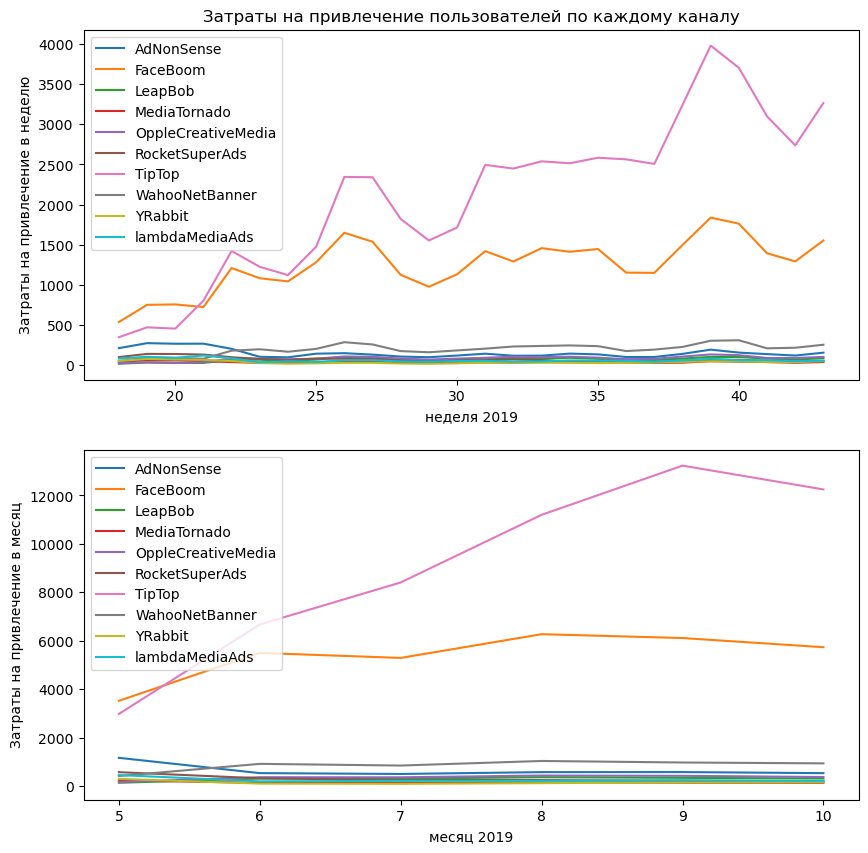

In [27]:
# добавим столбцы с номером недели и месяца
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

plt.figure(figsize=(10, 10))

# выводим график с затратами на привлечение по неделям
ax1 = plt.subplot(2, 1, 1)
(costs
 .pivot_table(
     index=costs.week,
     columns='channel',
     values='costs',
     aggfunc='sum'
 )
 .plot(ax=ax1)
)
ax1.legend(loc='upper left')
ax1.set_title('Затраты на привлечение пользователей по каждому каналу')
ax1.set_ylabel('Затраты на привлечение в неделю')
ax1.set_xlabel('неделя 2019')

# выводим график с затратами на привлечение по месяцам
ax2 = plt.subplot(2, 1, 2)
(costs
 .pivot_table(
     index=costs.month,
     columns='channel',
     values='costs',
     aggfunc=np.sum,
     fill_value=0
 )
 .plot(ax=ax2)
)
ax2.legend(loc='upper left')
ax2.set_ylabel('Затраты на привлечение в месяц')
ax2.set_xlabel('месяц 2019')

plt.show()

### Средняя стоимость привлечения одного пользователя (CAC) из каждого источника

In [28]:
# профили привлечённых пользоваталей, по которым были маркетинговые расходы
profiles_cost = profiles.query('channel != "organic"')

# считаем среднюю стоимость привлечения на каждого пользователя
cac_per_person = (
    profiles_cost[['user_id', 'acquisition_cost']]
    .drop_duplicates()
    .agg({'acquisition_cost': 'mean'})
)

# выведем сводную со стоимостью привлечения по каналам
cac_channel = (
    profiles
    .pivot_table(index = 'channel',
                 values = 'acquisition_cost',
                 aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'cac_per_person'})
)

display(
    cac_per_person,
    cac_channel
)

acquisition_cost    1.127481
dtype: float64

,cac_per_person
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


### Промежуточный итог
Узнали, что за данный период было потрачено около 105,5k на рекламные расходы, из них затраты на TipTop 54,8k и Faceboom - 32,4k, на остальные площадки затраты не превысили 5,5k.\
При этом TipTop имеет самую высокую стоимость привлечения - расходы 2,79 за каждого привлечённого клиента, в то время как у остальных площадок значение не превышает 1,12 - среднюю стоимость привлечения по всем источникам.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### LTV, CAC и ROI

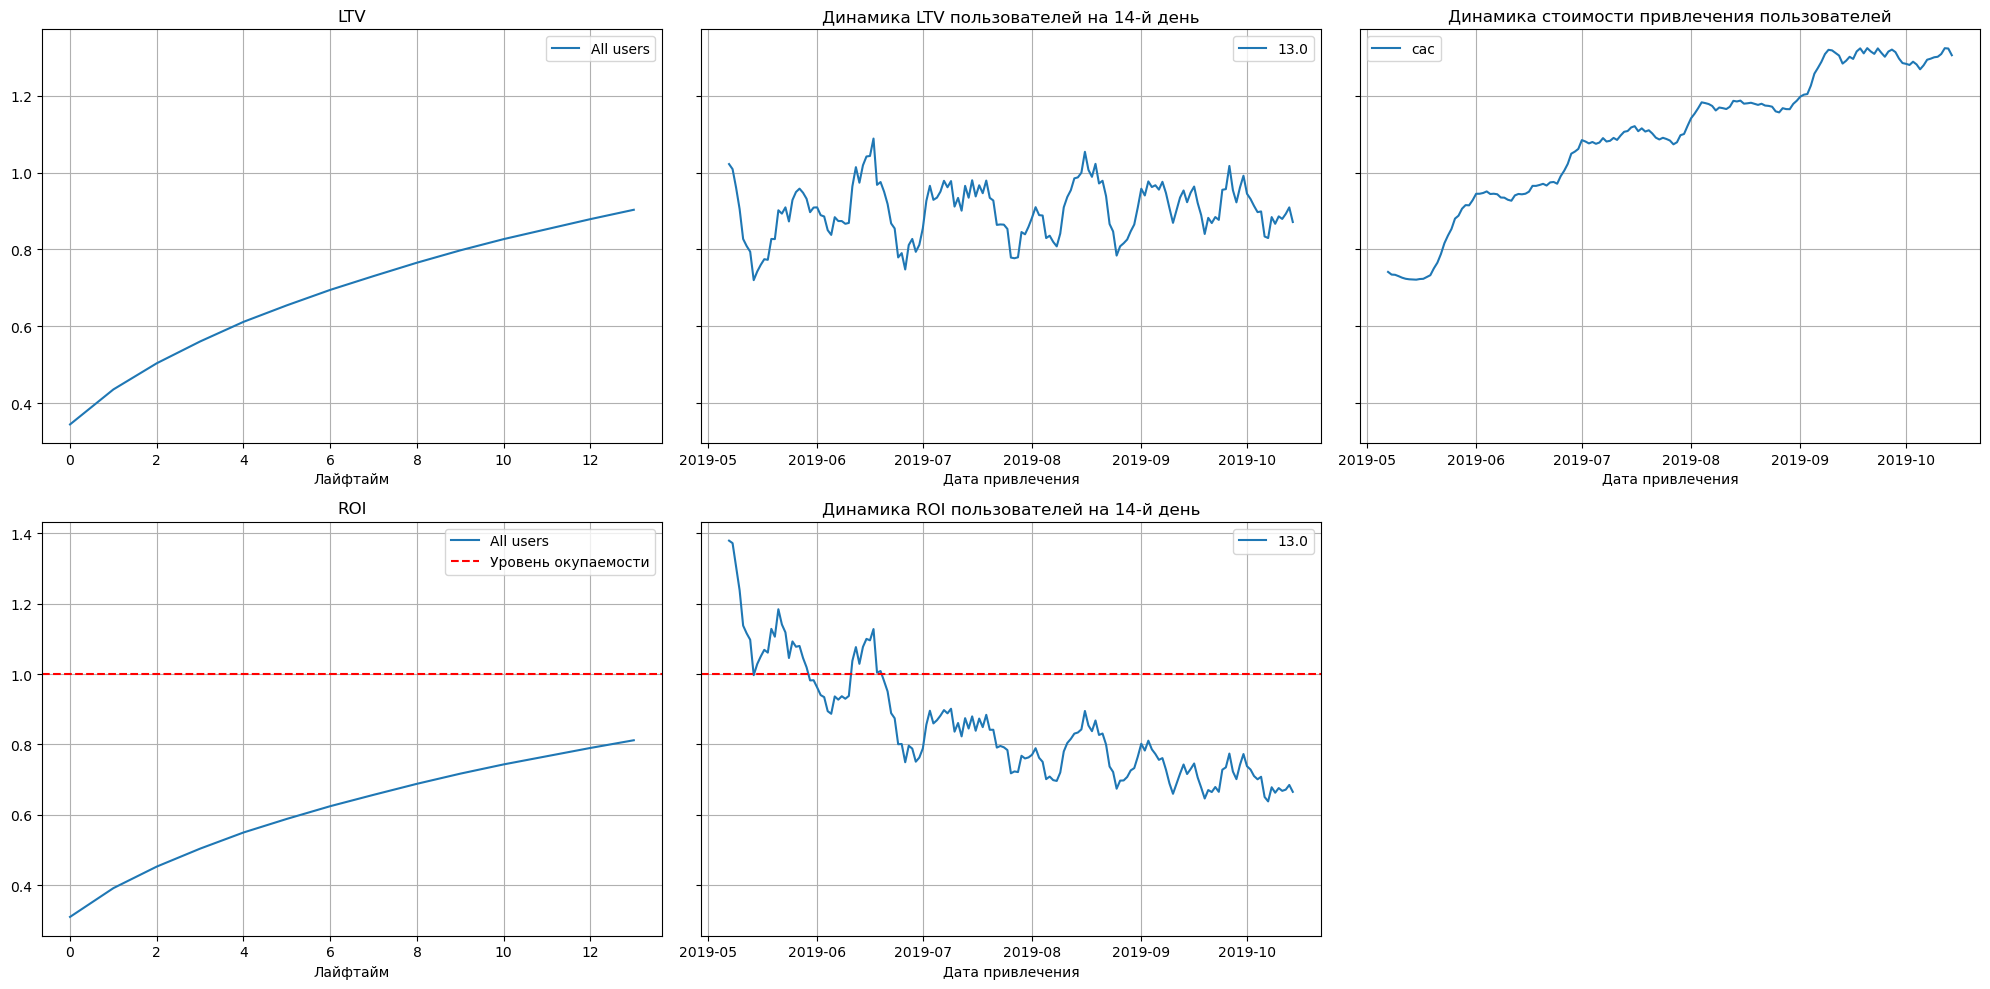

In [29]:
# считаем LTV, ROI, CAC и их динамику на 14-й день
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cost, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Окупаемость рекламы с разбивкой по устройствам

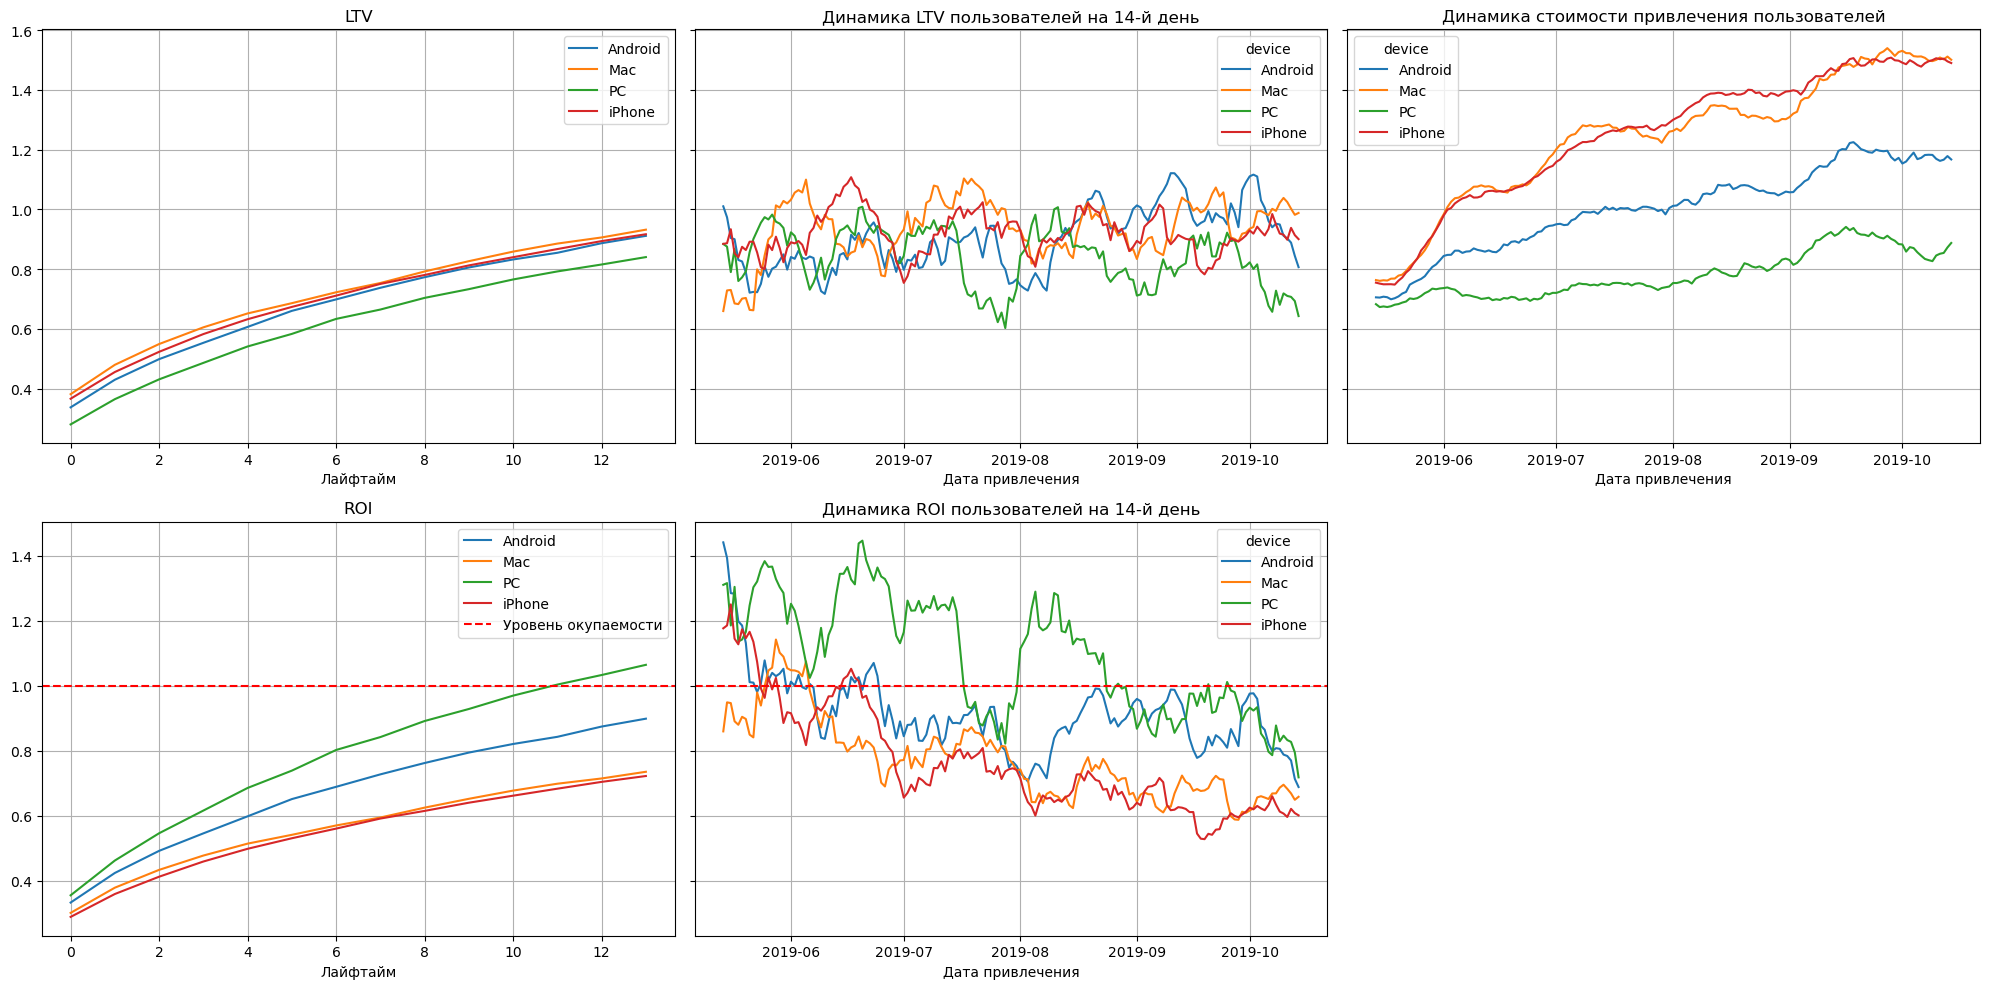

In [30]:
# считаем LTV, ROI, CAC и их динамику на 14-й день с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### Окупаемость рекламы с разбивкой по странам

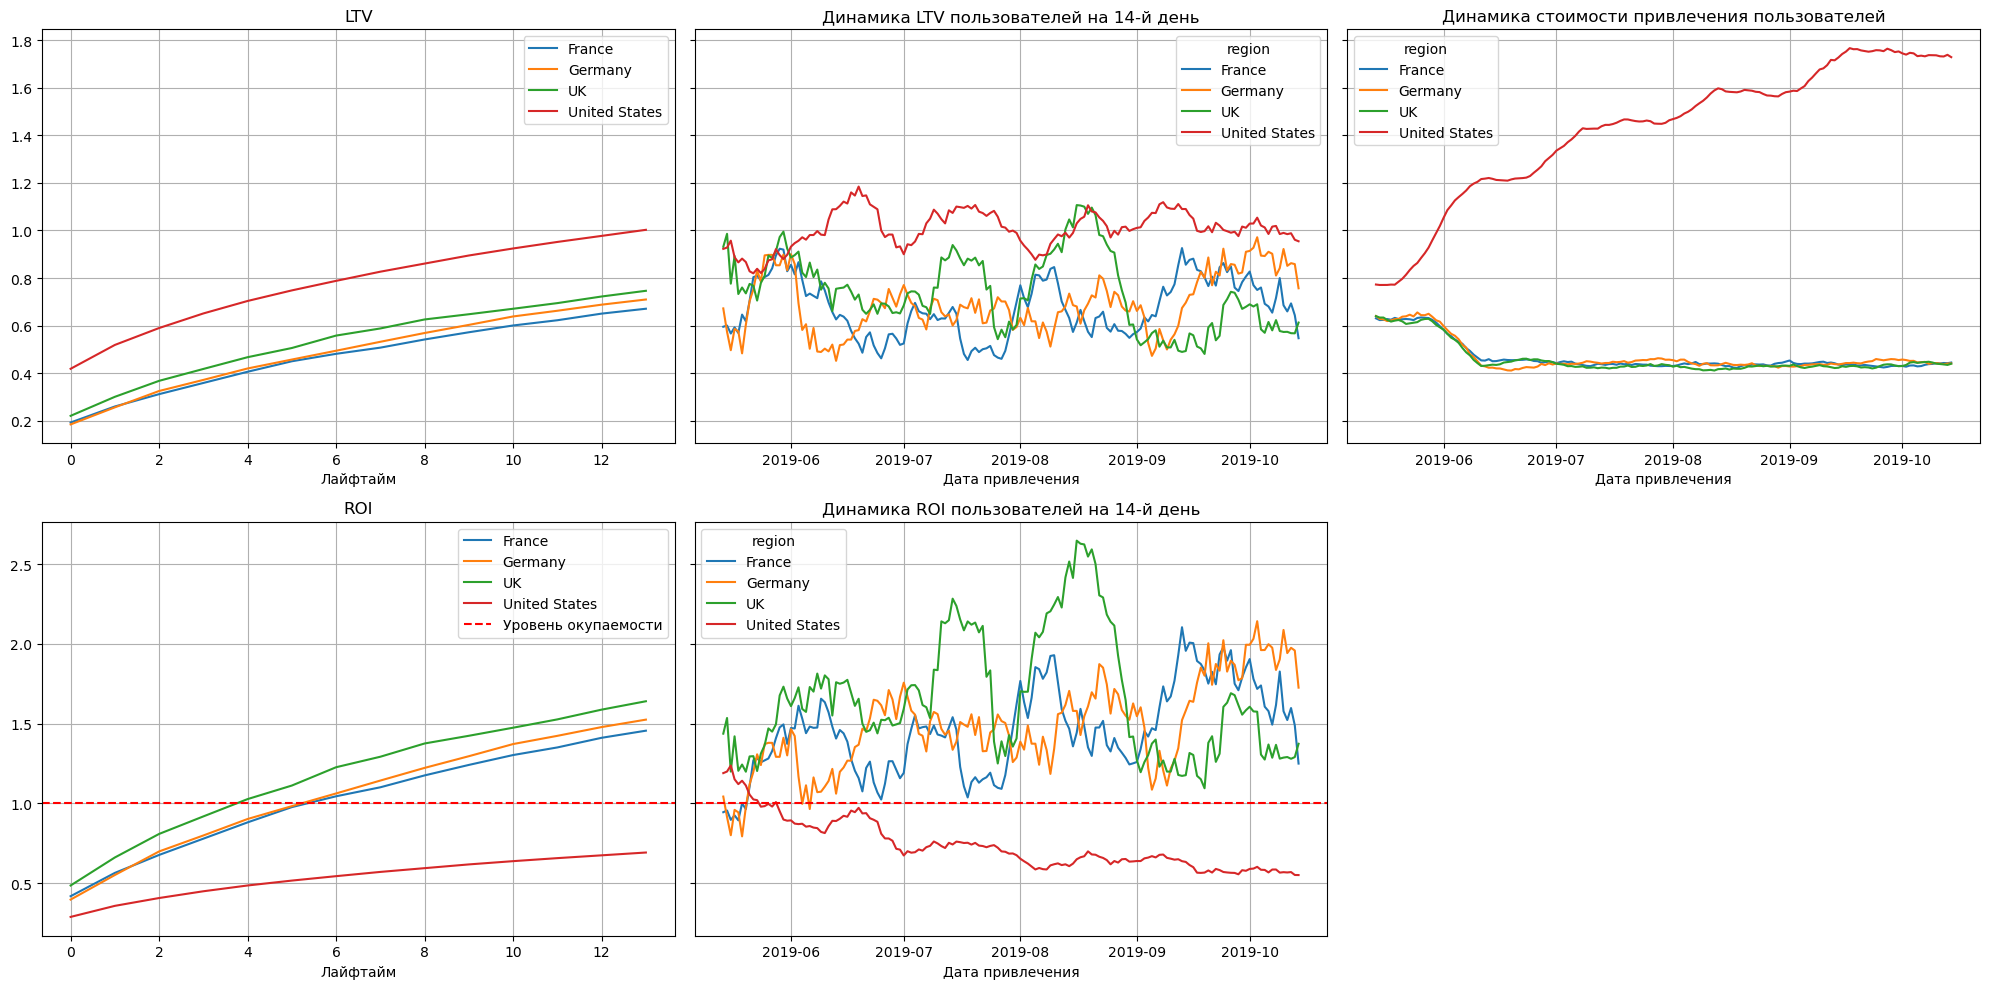

In [31]:
# считаем LTV, ROI, CAC и их динамику на 14-й день с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### Окупаемость рекламы с разбивкой по рекламным каналам

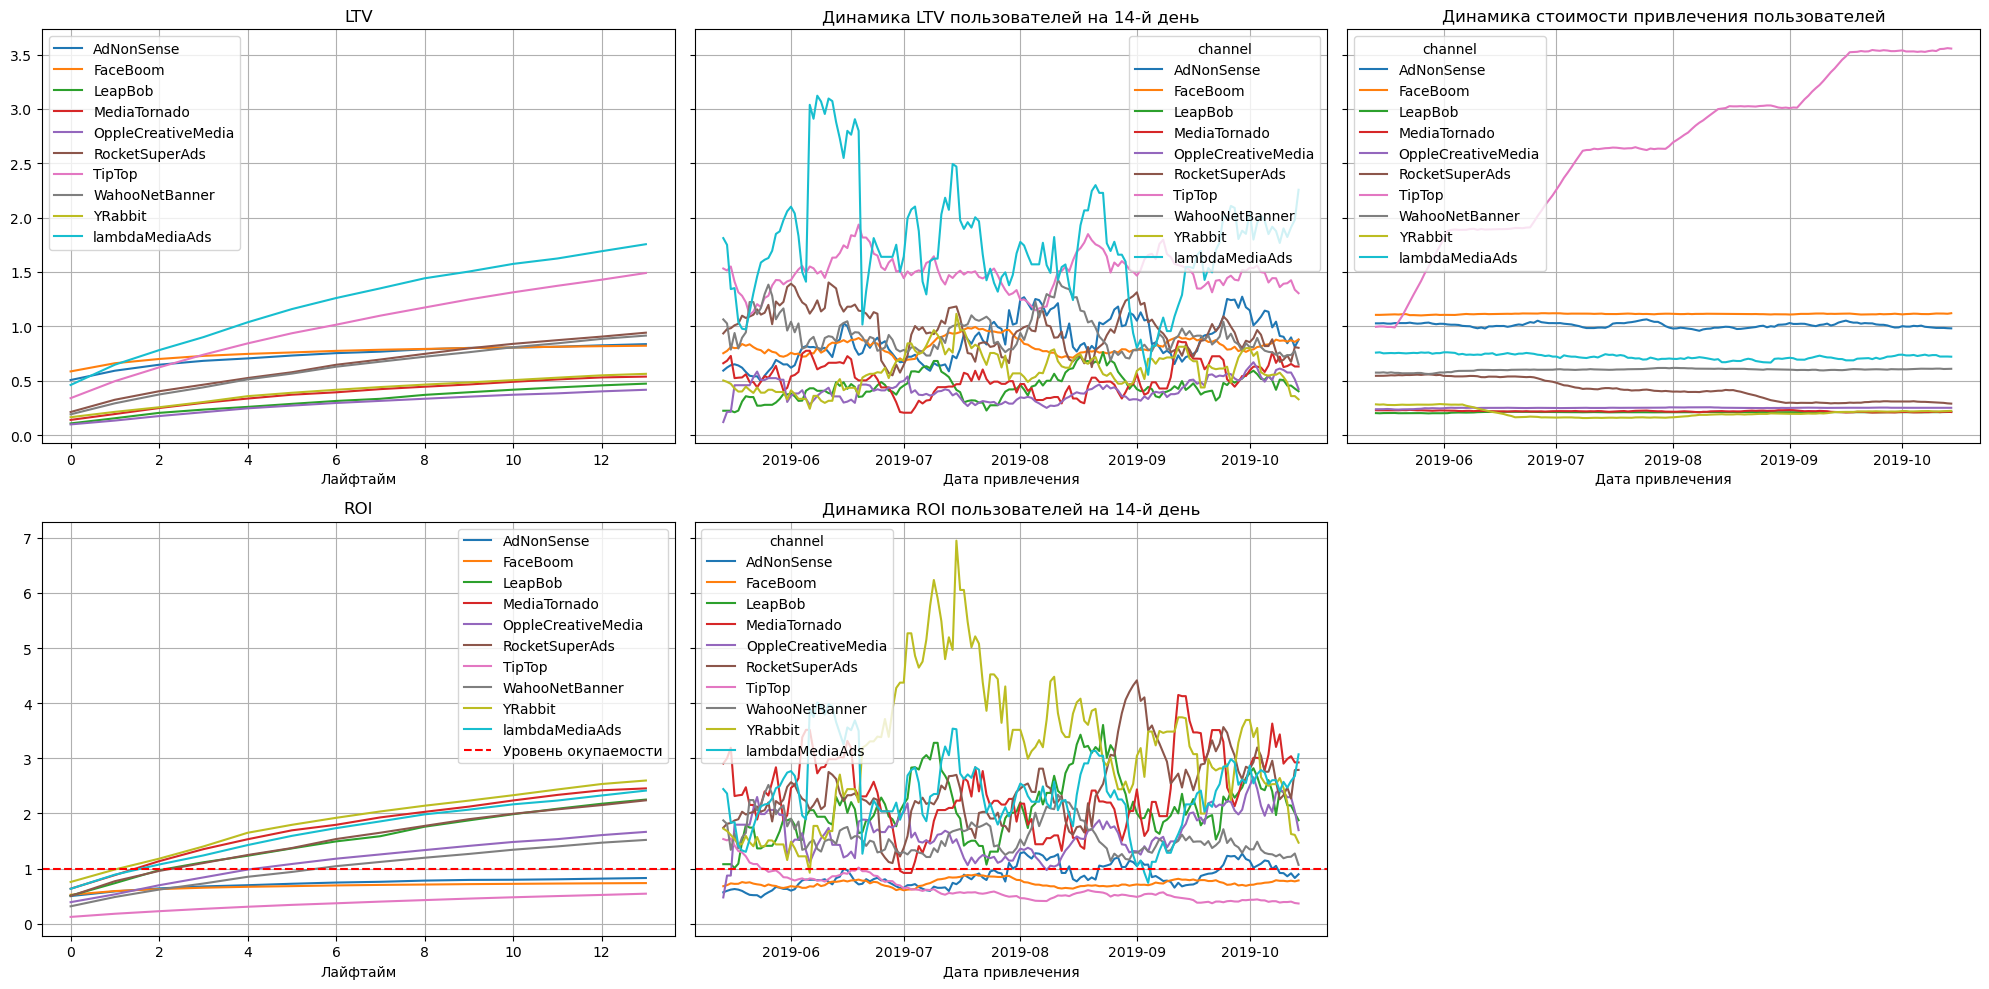

In [32]:
# считаем LTV, ROI, CAC и их динамику на 14-й день с разбивкой по каналам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### Конверсия пользователей и динамика её изменения

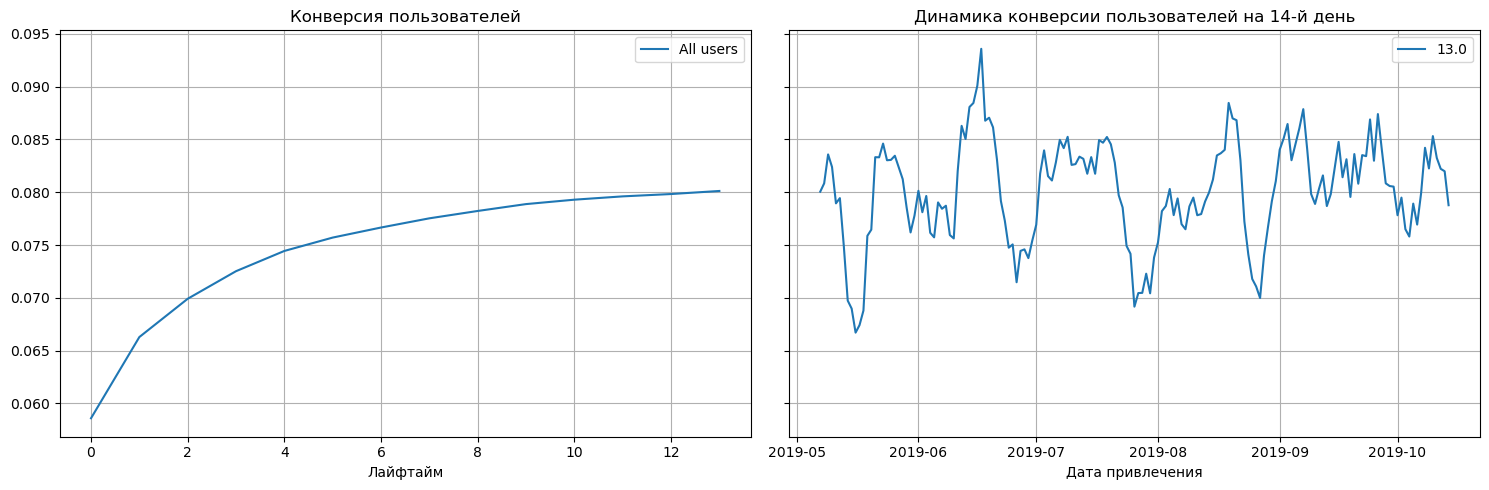

In [33]:
# считаем конверсию и динамику на 14-й день
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cost, orders, observation_date, horizon_days
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

### Удержание пользователей и динамика её изменения

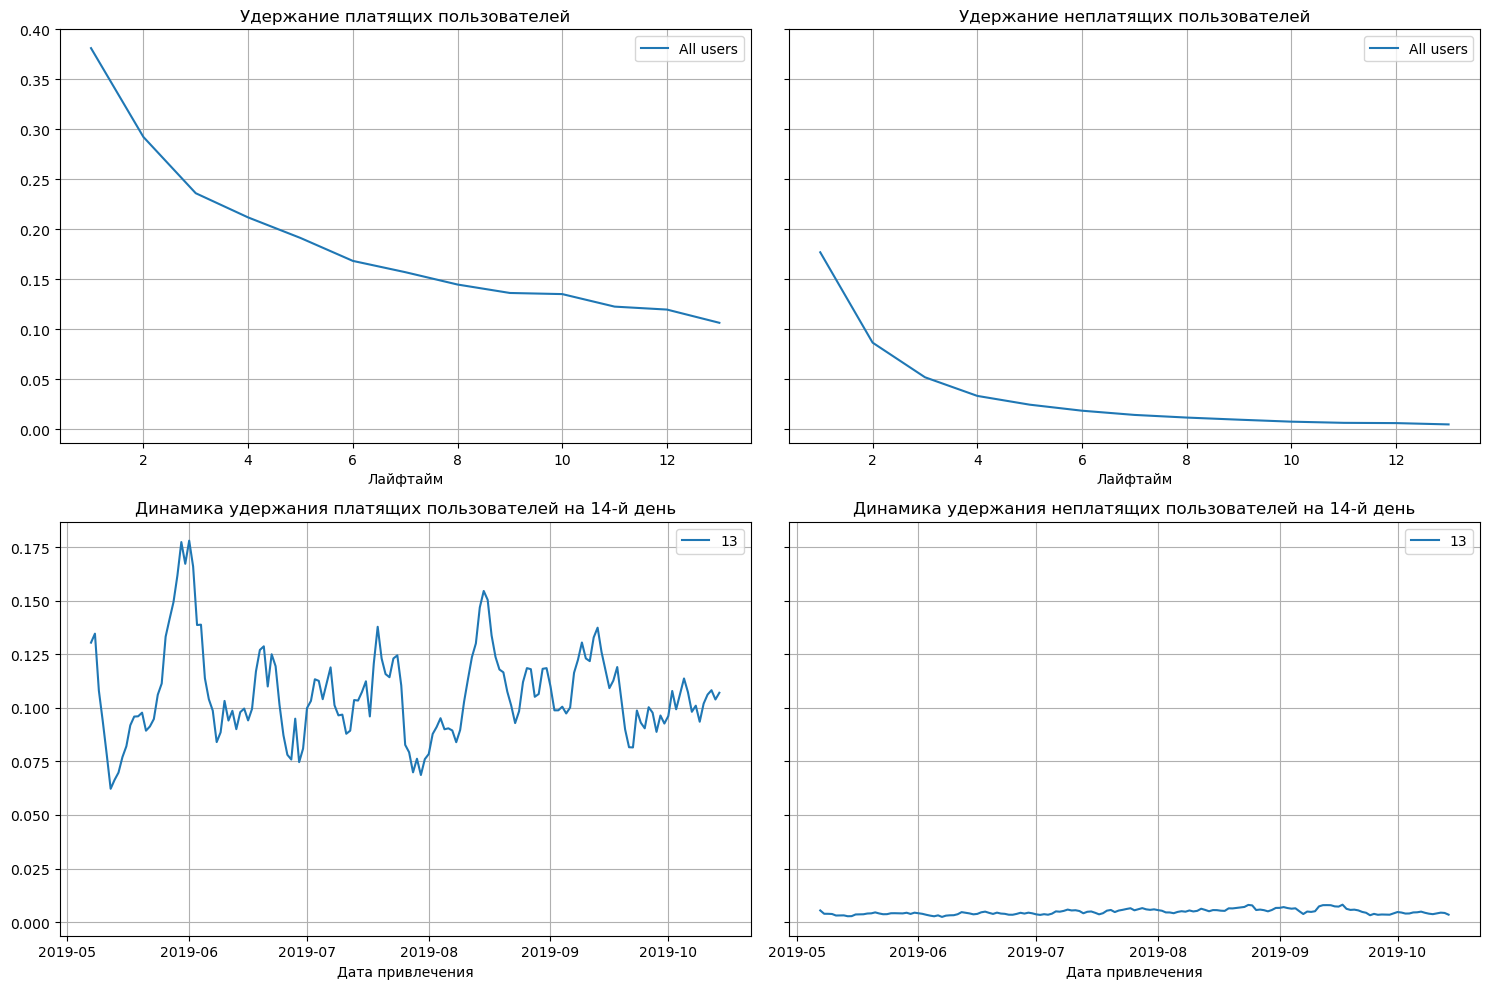

In [34]:
# считаем удержания и динамику на 14-й день
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cost, visits, observation_date, horizon_days
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days)

### Конверсия, удержание и динамика изменения с разбивкой по устройствам

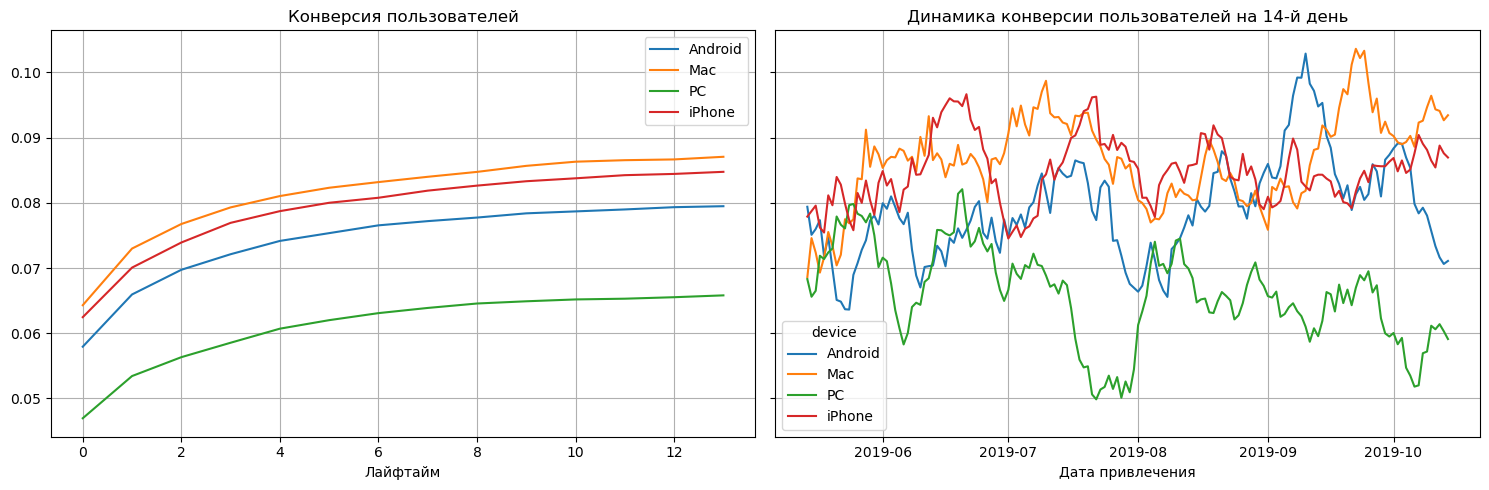

In [35]:
# считаем конверсию и динамику на 14-й день с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

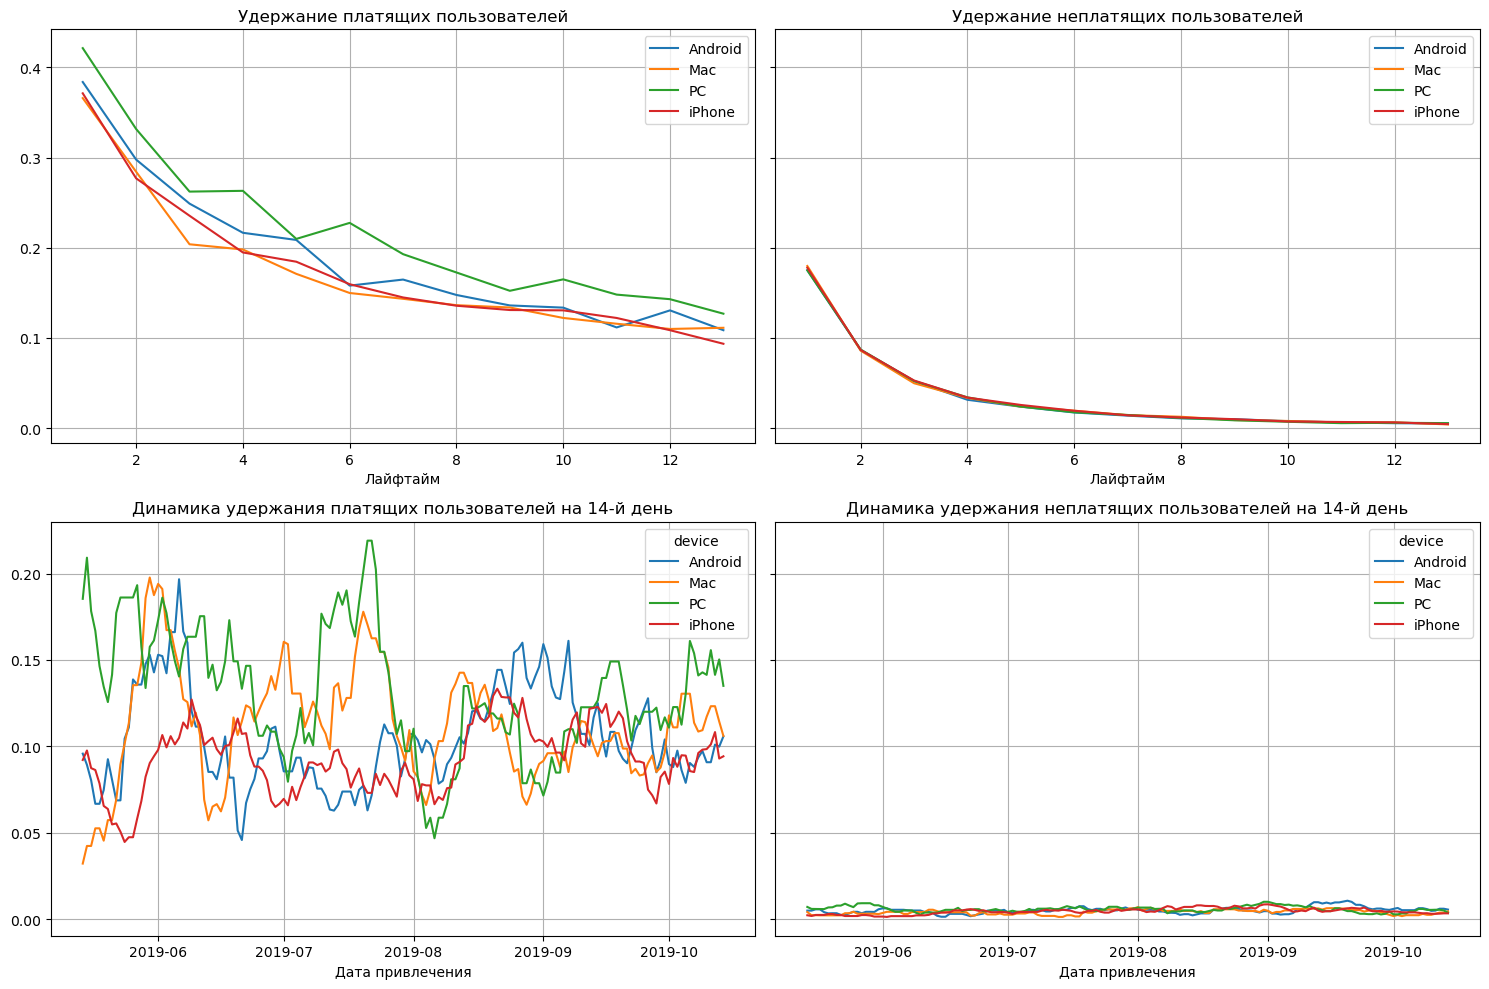

In [36]:
# считаем удержания и динамику на 14-й день с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cost, visits, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

### Конверсия, удержание и динамика изменения с разбивкой по странам

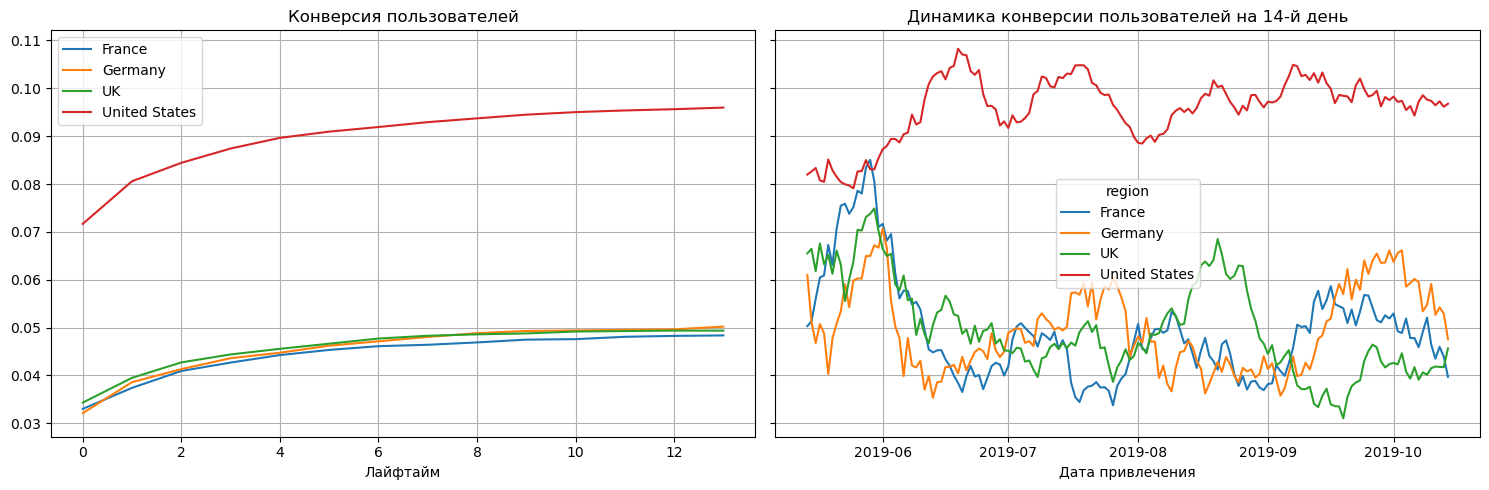

In [37]:
# считаем конверсию и динамику на 14-й день с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

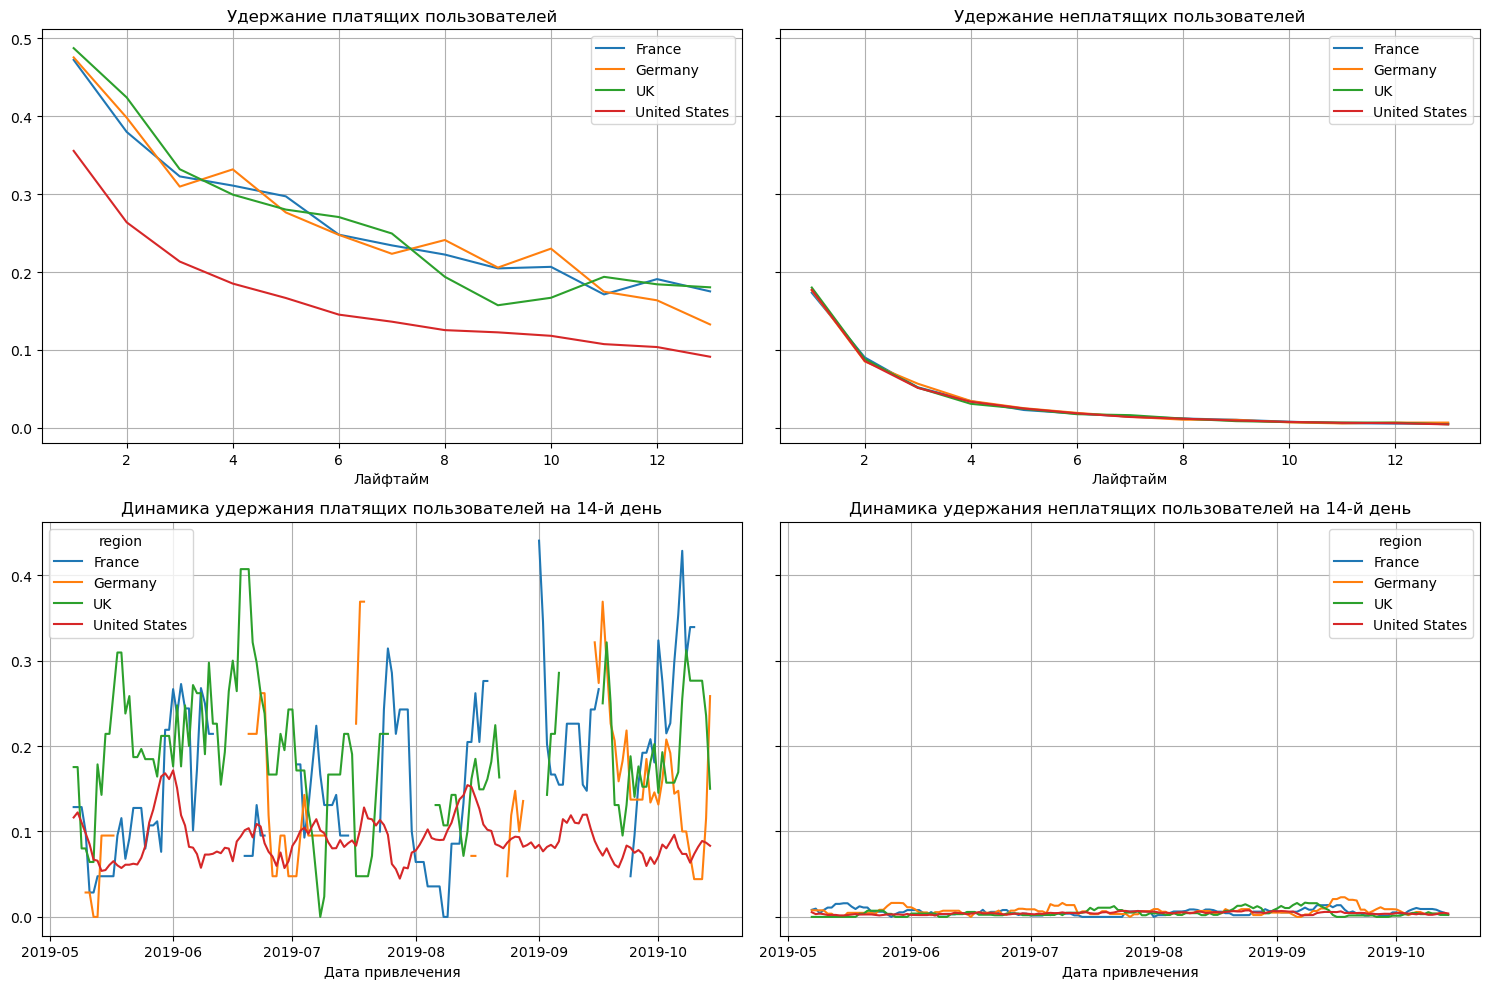

In [38]:
# считаем удержания и динамику на 14-й день с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cost, visits, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days)

### Конверсия, удержание и динамика изменения с разбивкой по рекламным каналам

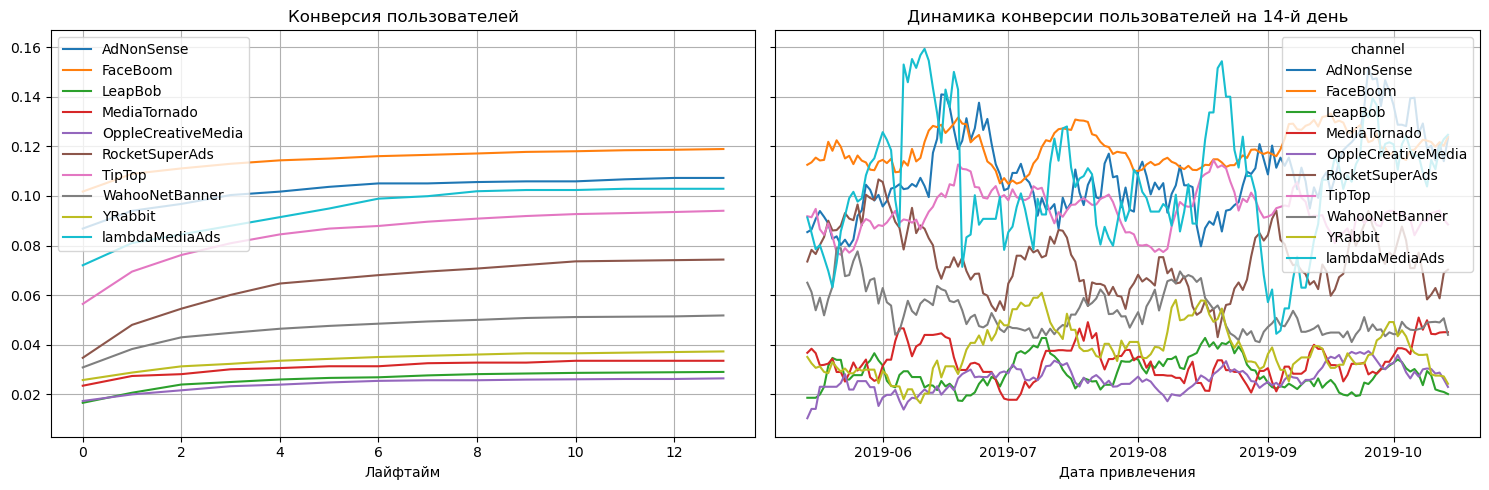

In [39]:
# считаем конверсию и динамику на 14-й день с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cost, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

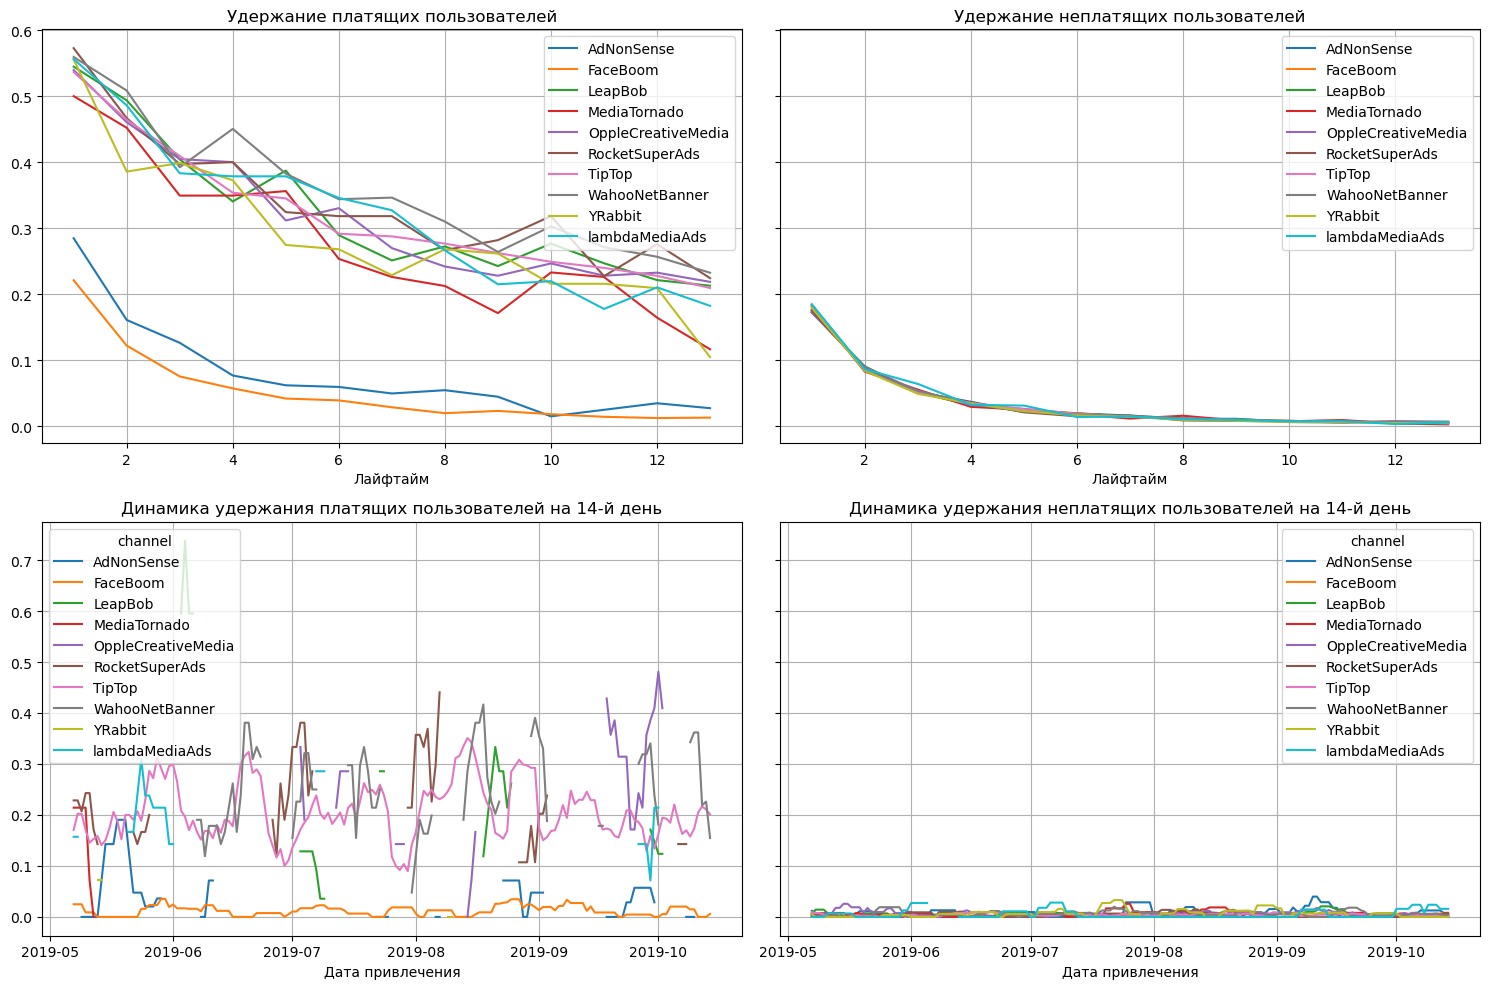

In [40]:
# считаем удержания и динамику на 14-й день с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cost, visits, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days)

### Промежуточный итог
**Реклама, направленная на привлечение пользователей, к прогнозируемому 14-му дню в целом не окупается.**
- Из стран может оказывать плохое влияние на рекламную кампанию США, т.к. стоимость привлечения каждого клиента в этой стране стоит в два раза дороже, чем средний привлечённый пользователь. Также платящие пользователи в этом регионе хуже удерживаются. При этом здесь высокий показатель конверсии.
- Из устройств хуже всего окупаются девайсы Apple. По удержанию они на уровне с остальными, в конверсии даже лучше среднего.
- Из источников привлечения - Faceboom за исследуемый период никогда не окупался на горизонте 14 дней. Также AdNonSense имеет схожие показатели. Обе площадки заметно хуже остальных в плане удержания платящих клиентов.

**Чем могут быть вызваны проблемы окупаемости?**
По графикам видно, что стали сильно "закидывать" деньгами: из стран - США, из устройств - девайсы Apple, а из источников привлечения - TipTop. Видимо, сделали ставку на те каналы, где "пожизненная ценность" пользователей была выше всего, но так сильно увеличили траты, что данные факторы стали негативными.

## Выводы

Компания-заказчик представлена на рынке Европы (Германия, Франция и Великобритания) и в США. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Мы проанализировали данные, предоставленные компанией-заказчиком (информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года):
- лог сервера с данными об их посещениях,
- выгрузку покупок за этот период,
- рекламные расходы.

В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop и AdNonSence (топ3 САС):
- высокая стоимость привлечения у этих каналов не окупается с горизонтом событий в две недели;
- расходы на привлечение в TipTop за полгода выросли почти в три раза.\
Faceboom и AdNonSense в свою очередь имеют низкий показатель удержания платящих клиентов.

Можно сделать заключение, что в июне сделали упор на каналы с высоким показателем LTV, а именно: девайсы Apple, TipTop и регион США. Но расходы выросли несопоставимо сильно, что только ухудшило показатели по данным источникам.

### В качестве рекомендаций предлагаем следующие направления:

1. Возможно, отказаться от привлечения через FaceBoom, т.к. данная площадка не окупается и не удерживает платящих пользователей, при этом занимает второе место по расходам на рекламу. Также можно снизить траты на AdNonSense, т.к. его показатели сопоставимы с Faceboom.
2. Снизить расходы на TipTop. Он остаётся отличным каналом, но сильные расходы сделали его негативным для компании. Если есть возможность проанализировать с каких источников внутри канала приходят пользователи - сократить нецелевые траты и тем самым уменьшить стоимость привлечения за каждого клиента.
3. Увеличить расходы на рекламу в lambdaMediaAds, т.к. пожизненная ценность клиентов на уровне с TipTop и окупается в среднем менее, чем за 2 дня.
4. Также достаточно перспективным выглядит RocketSuperAds: окупаемость около 2 дней, а "пожизненная ценность" - выше среднего значения.
5. Высокая доля "органических" пользователей и низкий процент платящих среди них - 2%. Они уже сэкономили большую сумму денег компании тем, что нашли приложение Procrastinate Pro+ сами - осталось их замотивировать совершить покупку и, возможно, пустить часть рекламного бюджета на данных клиентов.